# Compare the transmission throughput in 2023

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : May 26th 2023
- update : May 26th 2023

** Kernel anaconda3_auxtel**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

## Config

In [3]:
!ls dataout

MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-2023-01-17-HD38666.csv
MLfit_bouguer_linearfit-2023-01-18-HD38666.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_30nm_out.csv
MLfit_bouguer_linearfit-20230509-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230510-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv
MLfit_bouguer_linearfit-20230511-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv


In [4]:
DATE = "January 2023"
FILTERTYPE = "empty~holo4_003"
SITE = "AUXTEL"
spectractormode = "psf2dffm"
ext = "rebin2"   # run BPS by removing ACQ
FLAG_POLAR = False
filename1 = "dataout/MLfit_bouguer_linearfit-2023-01-17-HD38666.csv"
filename2 = "dataout/MLfit_bouguer_linearfit-2023-01-18-HD38666.csv"



## Read file

In [5]:
df1 = pd.read_csv(filename1,index_col=0)
df2 = pd.read_csv(filename2,index_col=0)

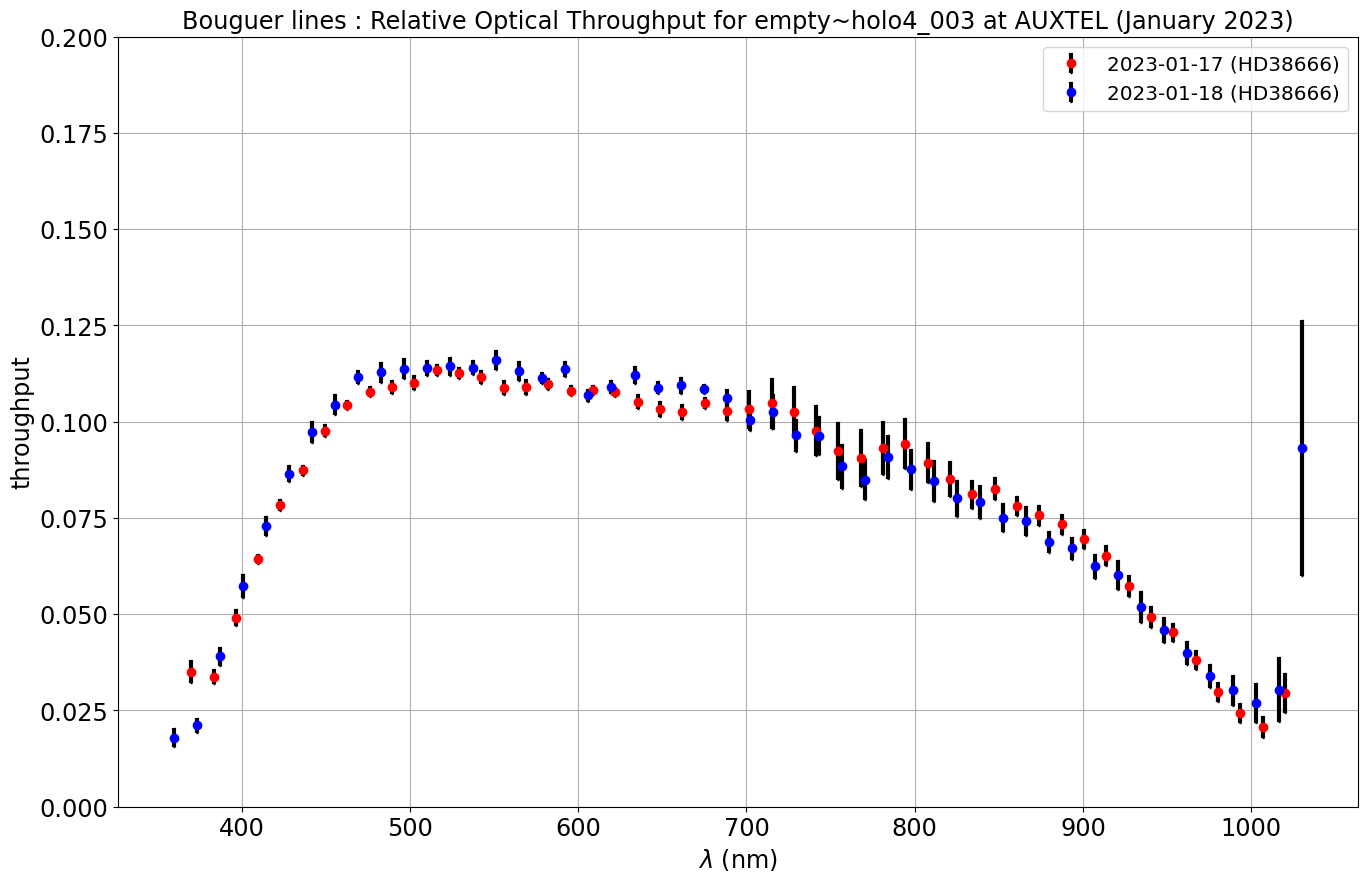

In [18]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)

X1=df1["wavelength"].values
Y1=df1["throu"].values
EY1= df1["errthrou"].values

X2=df2["wavelength"].values
Y2=df2["throu"].values
EY2= df2["errthrou"].values


ax.errorbar(X1,Y1, yerr=EY1, xerr=None, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax.errorbar(X2,Y2, yerr=EY2, xerr=None, fmt='o',color="b",ecolor="k", elinewidth=3, capsize=1,label="2023-01-18 (HD38666)")

ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)
ax.grid()
ax.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.set_ylim(0,0.2)
ax.legend()
        

## Add fitted throughputs

In [7]:
path1 = "../../FitAtmosphericParameters/202304/dataout/throughput"

In [8]:
list_of_files = os.listdir(path1)

In [9]:
all_df_fit1 = []
all_dates_fit1 = []
for filename in list_of_files:
    fullfilename = os.path.join(path1,filename)
    date = re.findall("^throughput-(.*)-empty~holo4_003-psf2dffm-multifitatmparams.csv$",filename)[0]
    df_fit = pd.read_csv(fullfilename,index_col=0)
    all_df_fit1.append(df_fit)
    all_dates_fit1.append(date)

In [10]:
path2 = "../../FitAtmosphericParameters/202305/dataout/throughput"

In [11]:
list_of_files = os.listdir(path2)

In [12]:
all_df_fit2 = []
all_dates_fit2 = []
for idx,filename in enumerate(list_of_files):
    fullfilename = os.path.join(path2,filename)
    date = re.findall("^throughput-(.*)-empty~holo4_003-psf2dffm-multifitatmparams.csv$",filename)[0]
    
    if date != "2023-05-10":
        df_fit = pd.read_csv(fullfilename,index_col=0)
        all_df_fit2.append(df_fit)
        all_dates_fit2.append(date)

In [13]:
all_dates_fit2

['2023-05-11', '2023-05-09']

In [14]:
all_df_fit = all_df_fit1 + all_df_fit2
all_dates_fit = all_dates_fit1 + all_dates_fit2 

In [15]:
NF = len(all_df_fit)
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NF)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NF), alpha=1)

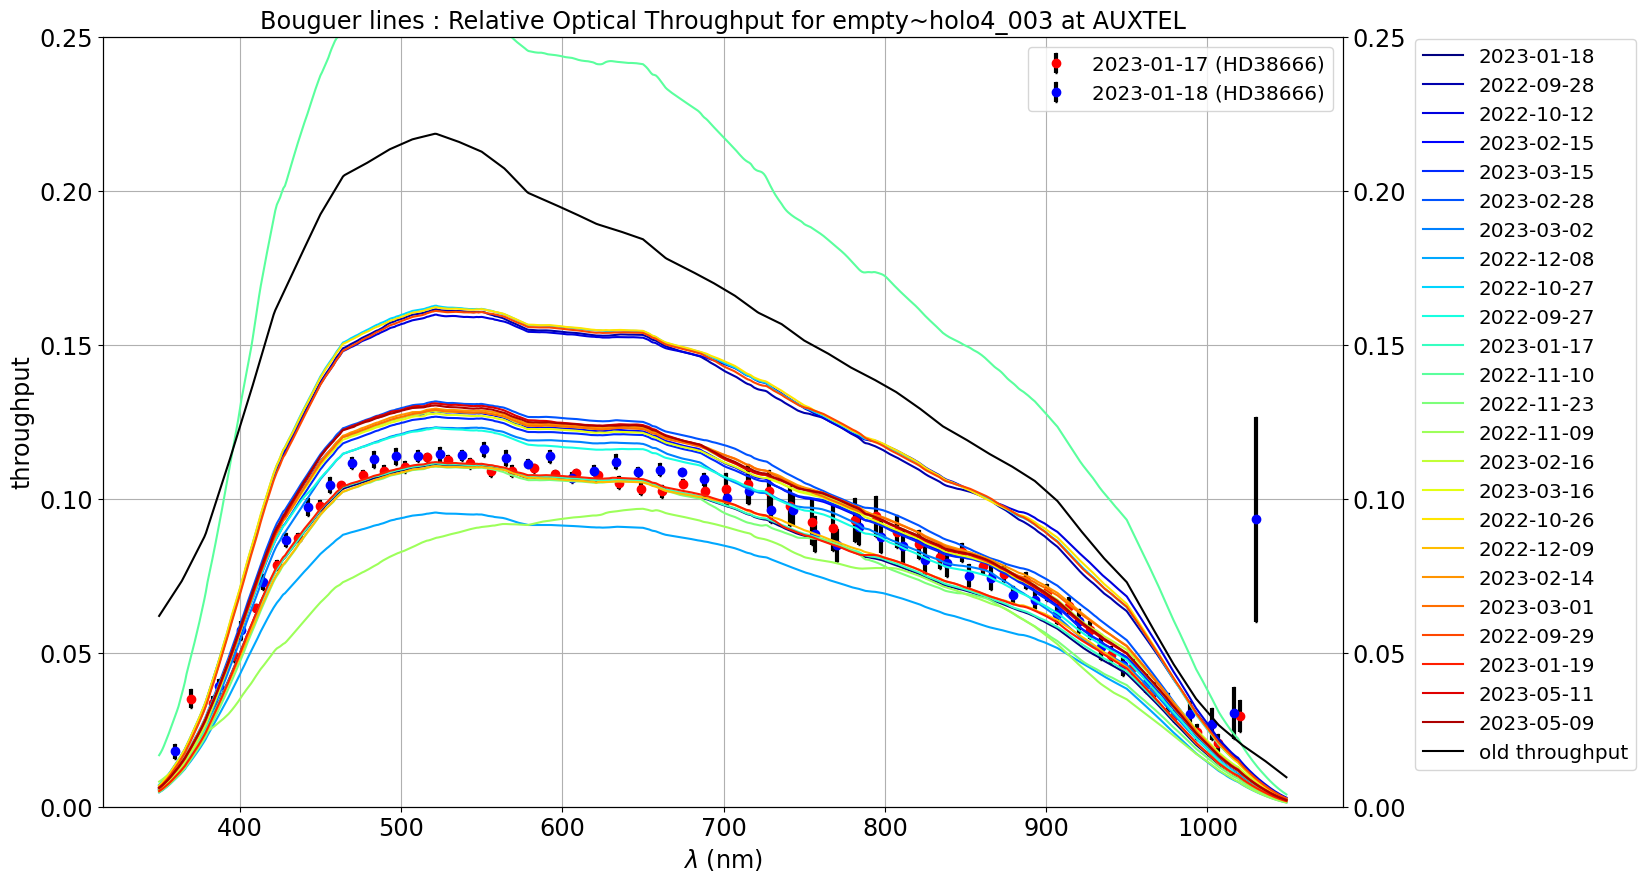

In [19]:
fig = plt.figure(figsize=(16,10))
ax1=fig.add_subplot(111)

ax1.errorbar(X1,Y1, yerr=EY1, xerr=None, fmt='o',color="r",ecolor="k", elinewidth=3, capsize=1,label="2023-01-17 (HD38666)")
ax1.errorbar(X2,Y2, yerr=EY2, xerr=None, fmt='o',color="b",ecolor="k", elinewidth=3, capsize=1,label="2023-01-18 (HD38666)")


ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE}"
ax1.set_title(title)
ax1.grid()
ax1.legend()
#ax.set_xlim(WLMINSEL,WLMAXSEL)
ax1.set_ylim(0,0.25)
ax1.legend()

# Direct fit
ax2 = ax1.twinx() 
ax2.set_ylim(0,0.25)

for idx in range(NF):
    wl = all_df_fit[idx]["wavelength"]
    tr = all_df_fit[idx]["newthrou"]
    tr0 = all_df_fit[idx]["oldthrou"]
    thdt = all_dates_fit[idx]
    
    ax2.plot(wl,tr,label=thdt,c=all_colors[idx])

    
ax2.plot(wl,tr0,'k-',label='old throughput')
    
ax2.legend(bbox_to_anchor=(1.05, 1.01))
